In [1]:
import numpy as np
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True)

# Moore's Law

Moore's law states that the number of transistors per square inch on IC doubles approximately every 2 years.
This indicates that the computer power grows exponentially.

The equation for moore's law is as follows:
$$
\begin{equation}
C = C_0r^t \\
\text{where t = time}
\end{equation}
$$

But as we can see that the above equation is exponential then how can we apply linear regression to the problem?

Luckily there is a math tool called log. So if we apply log on both sides to the equation we get the following

$$
\begin{equation}
log(C) = log(r) \times t + log(C_0)
\end{equation}
$$

Comparing Eqn(2) with Linear Regression as follows:

$$
\begin{equation}
y = mx + c
\end{equation}
$$

We can see that 
```
y = log(C)
m = log(r)
b = log(C_0)
x = t
```

In [2]:
# Load the data 
data = pd.read_csv('./moore.csv', sep=';')
data

,Year,Transistors,Clock (MHz),Power Density (W/cm²),Cores
0,1971,2300,0.74,3.750000,1
1,1974,4500,2.00,3.900000,1
2,1976,6500,3.00,4.450000,1
3,1978,29000,5.00,5.666667,1
4,1979,29000,5.00,5.151515,1
...,...,...,...,...,...
102,2013,1300000000,2000.00,25.966851,4
103,2014,1300000000,1900.00,8.287293,2
104,2015,1300000000,2700.00,57.317073,4
105,2015,1300000000,2000.00,54.878049,8


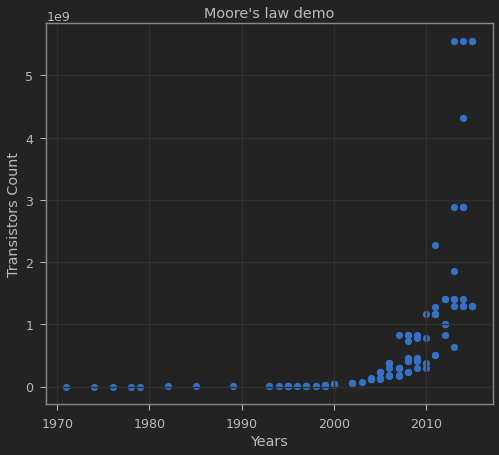

In [3]:
X = data.values[:, 0].reshape(-1, 1)
Y = data.values[:, 1].reshape(-1, 1)

plt.scatter(X, Y)
plt.xlabel("Years")
plt.ylabel("Transistors Count")
plt.title("Moore's law demo")
plt.show()

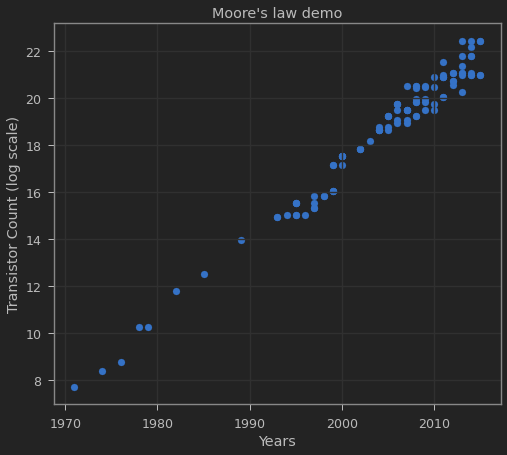

In [4]:
# As our requirement is a linear model thereby we use the log variant of Y
Y = np.log(Y)
plt.scatter(X, Y)
plt.xlabel("Years")
plt.ylabel("Transistor Count (log scale)")
plt.title("Moore's law demo")
plt.show()

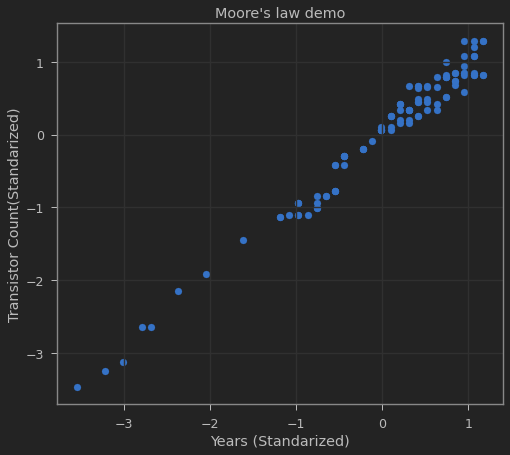

In [5]:
# Now let's do some preprocessing on the data
# We will apply normalization to the dataset
# formula is X = (X - X.mean()) / X.std()

mux = X.mean()
muy = Y.mean()
stdx = X.std()
stdy = Y.std()

X = (X - mux) / stdx
Y = (Y - muy) / stdy

plt.scatter(X, Y)
plt.xlabel("Years (Standarized)")
plt.ylabel("Transistor Count(Standarized)")
plt.title("Moore's law demo")
plt.show()

In [6]:
# Create the model
model = nn.Linear(1, 1)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

# Load torch tensors
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [7]:
# train the model
epochs = 100
losses = []

for epoch in range(epochs):
    
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Track the losses
    losses.append(loss)
    
    # Backward and optimize
    loss.backward()
    optimizer.step()
    
    
    print("Epoch : {}/{}, Loss : {:.4f}".format(epoch + 1, epochs , loss.item()))
    

Epoch : 1/100, Loss : 1.9015
Epoch : 2/100, Loss : 1.8272
Epoch : 3/100, Loss : 1.7058
Epoch : 4/100, Loss : 1.5584
Epoch : 5/100, Loss : 1.4006
Epoch : 6/100, Loss : 1.2429
Epoch : 7/100, Loss : 1.0921
Epoch : 8/100, Loss : 0.9523
Epoch : 9/100, Loss : 0.8255
Epoch : 10/100, Loss : 0.7122
Epoch : 11/100, Loss : 0.6125
Epoch : 12/100, Loss : 0.5253
Epoch : 13/100, Loss : 0.4499
Epoch : 14/100, Loss : 0.3849
Epoch : 15/100, Loss : 0.3293
Epoch : 16/100, Loss : 0.2819
Epoch : 17/100, Loss : 0.2415
Epoch : 18/100, Loss : 0.2073
Epoch : 19/100, Loss : 0.1783
Epoch : 20/100, Loss : 0.1539
Epoch : 21/100, Loss : 0.1333
Epoch : 22/100, Loss : 0.1159
Epoch : 23/100, Loss : 0.1013
Epoch : 24/100, Loss : 0.0890
Epoch : 25/100, Loss : 0.0787
Epoch : 26/100, Loss : 0.0701
Epoch : 27/100, Loss : 0.0628
Epoch : 28/100, Loss : 0.0567
Epoch : 29/100, Loss : 0.0516
Epoch : 30/100, Loss : 0.0473
Epoch : 31/100, Loss : 0.0437
Epoch : 32/100, Loss : 0.0407
Epoch : 33/100, Loss : 0.0382
Epoch : 34/100, Los

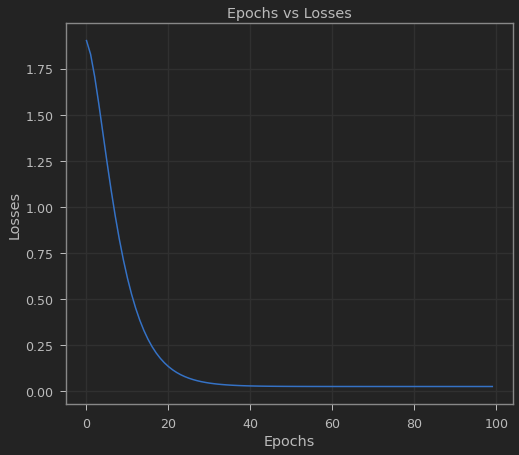

In [8]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Epochs vs Losses")
plt.show()

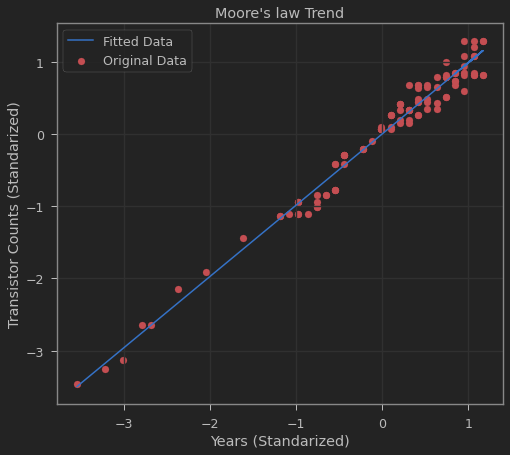

In [9]:
# Predict the trend line
prediction = model(inputs).detach().numpy()
plt.scatter(X, Y, c='r',label="Original Data")
plt.plot(X, prediction, label = "Fitted Data")
plt.xlabel("Years (Standarized)")
plt.ylabel("Transistor Counts (Standarized)")
plt.title("Moore's law Trend")
plt.legend()
plt.show()

In [10]:
# Check the weight of the model
weights = model.weight.data.numpy()
print(weights)

[[0.98709124]]


# Transforming back to the Original Scale

The original hypothesis was that the growth is exponential:
$$
\begin{equation}
C = C_0r^t
\end{equation}
$$

In the above equation $C$ is the transistor count in the year $t$ and $C_0$ is the transistor count in the year 
$t_0$ and $r$ is the rate of growth

To make the above equation linear we took log on both sides:

$$
\begin{equation}
log(C) = log(r) \times t + log (C_0)
\end{equation}
$$

The above equation now represent as a linear regression equation where the variable $log(C)$ goes into the y-axis and the variable $t$ goes into the the x-axis


###  Transformation applied 

To fit the model in a specified scale we applied a transformation to both the x-values and the y-values as follows:

$$
\begin{equation}
x' = \frac{x - \mu_x}{\sigma_x} \\
y' = \frac{y - \mu_y}{\sigma_y}
\end{equation}
$$

Thereby the equation of our model after transformation is as follows:
$$
\begin{equation}
y' = mx' + b
\end{equation}
$$

To revert back to the original equation from the transformation equation we can replace $x'$ and $y'$ in the above equation as follows:

$$
\begin{equation}
\frac{y - \mu_y}{\sigma_y} = \frac{x - \mu_x}{\sigma_x}m + log(C_0)
\end{equation}
$$

After some equation manipulation we get the following:
$$
\begin{equation}
y = m\frac{\sigma_y}{\sigma_x}x - m\frac{\sigma_y}{\sigma_x}\mu_x + \sigma_ylog(C_0) + \sigma_y 
= ax + log(C_0)
\end{equation}
$$

So the slope in our case will be 
$$
\begin{equation}
a = m\frac{\sigma_y}{\sigma_x}
\end{equation}
$$

In [11]:
a = (weights[0, 0] * stdy) / stdx
print(a)

0.32636554824853026


# Exponential Growth Model

The current equation is linear in nature.

The original Moore's equation is:
$$
\begin{equation}
C = C_0r^t
\end{equation}
$$
where $C$ is the number of transistor count and $t$ is the year.
$r$ is the rate of growth.

When take log on both sides the resulting equation is as follows:
$$
\begin{equation}
log(C) = log(r) \times t + log(C_0)
\end{equation}
$$

Comparing the above equation with our linear equation :
$$
\begin{equation}
y = mx + log(C_0)
\end{equation}
$$

We get the following:
$$
\begin{equation}
y = log(C) \\
m = log(r)\\
x = t
\end{equation}
$$

Now we are interested in the rate of growth. Given our model weight which is equal to the log value of the rate of growth. We can find the original rate of growth as follows:

$$
\begin{equation}
w = 0.32636554824853026 \\
r = e^{0.32636554824853026} = 1.3859218976090688
\end{equation}
$$

Now to find the time it takes to double itself we simply need to find the value for $t$ which can be found easily as follows:
$$
\begin{equation}
2C = C_0r^t \\
C = C_0r^{t'} \\ 
\Rightarrow 2 = r ^{t - t'} \\
\Rightarrow log{2} = {t - t'} \times log{r} \\
\Rightarrow t - t' = \frac{log 2}{log r}
\end{equation}
$$

In [13]:
print("Time to double : {:.2f}".format(np.log(2) / a))

Time to double : 2.12
